<b>The raw dataset obtained, was given names for each column and saved as Nepali_dataset inside folder named raw in Data. This process was done in notebook Romanizing_test. Nepali_dataset was further transformed by generating embeddings for "Text" using encoders like Word2Vec in notebook Create_embeddings_for_df and the classification ready dataset is saved in Preprocessed</b>

In [1]:
#library import
import pandas as pd # for data manipulation and analysis
import numpy as np # for scientific computing with Python
import matplotlib.pyplot as plt # for data visualization
%matplotlib inline
import seaborn as sns # for advanced visualization


In [2]:
df= pd.read_csv('../Data/Preprocessed/pretrained_word2vec_df.csv')
df_word2vec= df.copy()
df_word2vec.head(2)


,0,1,2,3,4,5,6,7,8,9,...,291,292,293,294,295,296,297,298,299,Target
0,-0.353896,-0.362858,-0.423552,1.104782,-0.010077,0.141672,0.289903,0.133494,-0.097301,-0.684760,...,-1.099061,0.555198,-0.914626,0.487582,-0.510756,0.030198,0.281444,-0.032571,-0.526055,2
1,0.024839,-0.276190,-0.076623,0.665478,0.056230,0.578328,-0.236490,0.222671,-0.147569,-0.263676,...,-0.036520,0.926974,0.483738,0.741491,-0.771113,-0.622755,0.375458,0.073563,0.495352,3


In [3]:
from sklearn import metrics
from collections import Counter
from sklearn.svm import SVC
from sklearn.model_selection import learning_curve
from sklearn.metrics import make_scorer, log_loss
from sklearn.model_selection import KFold
from sklearn.metrics import classification_report


In [4]:
'''Splitting The df into train test val split at ratio 8:1:1 
Which is done default(although the ratio passable) by custom script train_test_val_split.py'''

from train_test_val_split import train_test_val_split

X_train_word2vec, X_test_word2vec, X_val_word2vec, y_train_word2vec, y_test_word2vec, y_val_word2vec = train_test_val_split(df_word2vec)



Shape of feature vectors (X): (4035, 300)
Shape of target labels (y): (4035,)


In [5]:
X_train_word2vec.head()

,0,1,2,3,4,5,6,7,8,9,...,290,291,292,293,294,295,296,297,298,299
3216,-0.062051,0.313414,0.006421,0.878125,0.376428,0.218356,0.700523,0.328919,0.305366,-0.532352,...,-0.234123,-1.273906,-0.503081,-0.033667,1.161342,-0.158712,0.525539,0.217499,-0.630042,0.110222
2849,0.195062,-0.581234,-0.678676,0.683623,-0.073074,0.059356,0.226723,0.492384,0.081750,-0.628620,...,-0.076904,-0.773215,0.080910,-0.039553,0.540909,-0.379840,-0.386223,0.170335,-0.062724,-0.001304
1476,0.779730,-0.673121,-0.477880,0.676557,0.023679,0.512841,0.076255,0.711259,0.440002,-1.029017,...,-0.925453,-0.600947,0.424719,-0.321963,0.666842,-0.384276,-0.212977,-0.168849,-0.323576,-0.264914
1761,0.174652,0.006270,-0.923466,0.791146,0.285221,0.649423,0.471511,0.203287,-0.100707,-1.006997,...,-0.457359,-0.714490,-0.229730,0.020207,-0.079368,-0.412656,-0.184476,0.207846,-0.154604,0.090382
771,-0.126672,-0.130432,0.014342,0.802733,0.528068,0.096862,0.217421,0.285175,-0.315277,-0.894969,...,-0.908980,-0.733666,-0.649373,-0.435190,0.834419,-0.077824,0.130598,-0.176358,0.281791,0.088447


check Model_training_v1 to know target encodeding
- FEEDBACK_0: 0
- FEEDBACK_1: 1
- GENERAL_0: 2
- GENERAL_1: 3
- PROFANITY_0: 4
- PROFANITY_1: 5
- VIOLENCE_0: 6
- VIOLENCE_1: 7

In [6]:
# Training SVC

svc_model = SVC(probability=True)
svc_model.fit(X_train_word2vec,y_train_word2vec)


SVC(probability=True)

In [7]:
# Function to evaluate model and returns target predictions 
def make_scores(model, features, target):
    model_pred = model.predict(features)

    print('Accuracy :{0:0.5f}'.format(metrics.accuracy_score(model_pred , target))) 

    roc_auc = metrics.roc_auc_score(target , model.predict_proba(features), multi_class='ovr')
    print('AUC : {0:0.5f}'.format(roc_auc))

    print('Precision : {0:0.5f}'.format(metrics.precision_score(target , model_pred, average='macro')))
    print('Recall : {0:0.5f}'.format(metrics.recall_score(target , model_pred, average='macro')))
    print('F1 : {0:0.5f}'.format(metrics.f1_score(target , model_pred, average='macro')))
    print(classification_report(target, model_pred))
    
    return model_pred

# Scores of SVC
svc_pred=make_scores(svc_model, X_test_word2vec, y_test_word2vec)

Accuracy :0.58313
AUC : 0.79079
Precision : 0.46817
Recall : 0.23576
F1 : 0.24029
              precision    recall  f1-score   support

           0       0.55      0.14      0.22        43
           1       0.00      0.00      0.00         8
           2       0.64      0.64      0.64       105
           3       0.56      0.89      0.69       178
           4       1.00      0.03      0.06        30
           5       1.00      0.18      0.31        11
           6       0.00      0.00      0.00        11
           7       0.00      0.00      0.00        17

    accuracy                           0.58       403
   macro avg       0.47      0.24      0.24       403
weighted avg       0.57      0.58      0.51       403



/home/angel-tamang/myenv/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/angel-tamang/myenv/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/angel-tamang/myenv/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/a

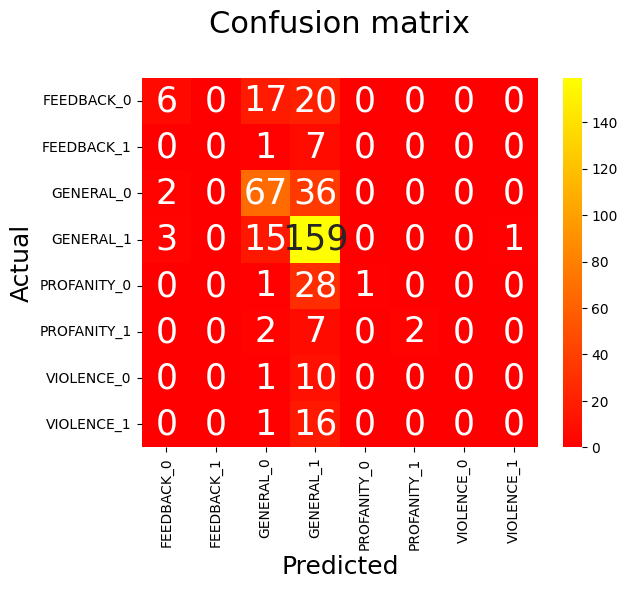

In [8]:
# Heatmap for Confusion Matrix
def make_confusion_matrix(target, prediction):
    cnf_matrix = metrics.confusion_matrix(target,prediction)
    cnf_matrix_df = pd.DataFrame(cnf_matrix,
                         index = ['FEEDBACK_0','FEEDBACK_1','GENERAL_0','GENERAL_1','PROFANITY_0','PROFANITY_1','VIOLENCE_0','VIOLENCE_1'], 
                         columns = ['FEEDBACK_0','FEEDBACK_1','GENERAL_0','GENERAL_1','PROFANITY_0','PROFANITY_1','VIOLENCE_0','VIOLENCE_1'])
    p = sns.heatmap(cnf_matrix_df, annot=True, annot_kws={"size": 25}, cmap="autumn" ,fmt='g')

    plt.title('Confusion matrix', y=1.1, fontsize = 22)
    plt.ylabel('Actual',fontsize = 18)
    plt.xlabel('Predicted',fontsize = 18)
    plt.show()

# Confusion Matrix for SVC
make_confusion_matrix(y_test_word2vec,svc_pred)

## Ok the model performs horrible, before tuning the model let's try PCA

In [9]:
import pandas as pd
from sklearn.decomposition import PCA

# Define the number of principal components
n_components = 50
pca = PCA(n_components=n_components)

# Apply PCA on the training set 
X_train_word2vec_pca = pca.fit_transform(X_train_word2vec)

# Transform the validation and test sets using the same PCA model
X_val_word2vec_pca = pca.transform(X_val_word2vec)
X_test_word2vec_pca = pca.transform(X_test_word2vec)

# Convert PCA results to DataFrames
X_train_word2vec_pca_df = pd.DataFrame(X_train_word2vec_pca, columns=[f"PC{i+1}" for i in range(n_components)])
X_val_word2vec_pca_df = pd.DataFrame(X_val_word2vec_pca, columns=[f"PC{i+1}" for i in range(n_components)])
X_test_word2vec_pca_df = pd.DataFrame(X_test_word2vec_pca, columns=[f"PC{i+1}" for i in range(n_components)])

print(X_train_word2vec_pca_df.head(1))


        PC1       PC2       PC3      PC4     PC5       PC6       PC7  \
0 -1.106379 -2.773511  1.666972  1.95305 -2.1663 -0.478019 -2.679707   

        PC8       PC9      PC10  ...      PC41      PC42      PC43     PC44  \
0  0.613778  1.301708 -0.594432  ...  1.328148  0.146718  0.081967  0.56692   

       PC45      PC46      PC47      PC48      PC49      PC50  
0 -0.433864 -0.059768 -0.135209 -0.176419  0.223256 -0.101965  

[1 rows x 50 columns]


Accuracy :0.59553
AUC : 0.77607
Precision : 0.34932
Recall : 0.21990
F1 : 0.20806
              precision    recall  f1-score   support

           0       0.55      0.14      0.22        43
           1       0.00      0.00      0.00         8
           2       0.68      0.68      0.68       105
           3       0.57      0.91      0.70       178
           4       1.00      0.03      0.06        30
           5       0.00      0.00      0.00        11
           6       0.00      0.00      0.00        11
           7       0.00      0.00      0.00        17

    accuracy                           0.60       403
   macro avg       0.35      0.22      0.21       403
weighted avg       0.56      0.60      0.51       403



/home/angel-tamang/myenv/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/angel-tamang/myenv/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/angel-tamang/myenv/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/a

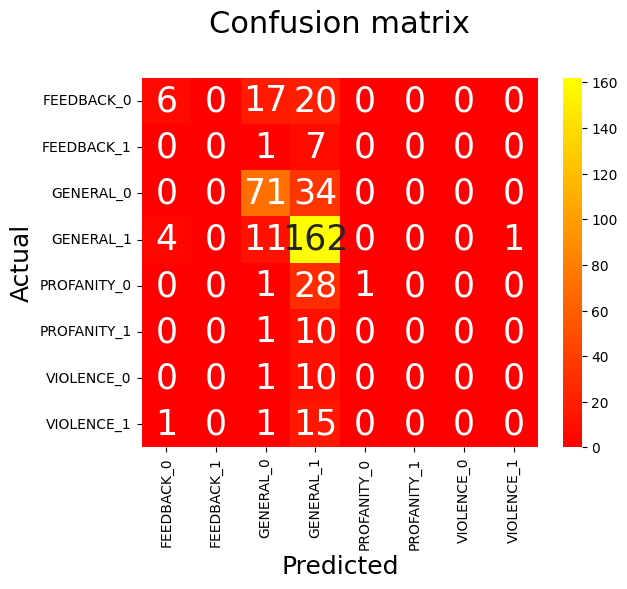

In [10]:
# Training SVC_pca

svc_model_pca = SVC(probability=True)
svc_model_pca.fit(X_train_word2vec_pca,y_train_word2vec)

# Scores of SVC_pca
svc_pca_pred=make_scores(svc_model_pca, X_test_word2vec_pca, y_test_word2vec)

# Confusion Matrix for SVC_pca
make_confusion_matrix(y_test_word2vec,svc_pca_pred)

Ok even PCA doesn't help SVM. Now, let's try AdaBoost

Accuracy :0.54094
AUC : 0.69550
Precision : 0.16121
Recall : 0.19119
F1 : 0.16617
              precision    recall  f1-score   support

           0       0.20      0.05      0.08        43
           1       0.00      0.00      0.00         8
           2       0.53      0.66      0.59       105
           3       0.56      0.83      0.67       178
           4       0.00      0.00      0.00        30
           5       0.00      0.00      0.00        11
           6       0.00      0.00      0.00        11
           7       0.00      0.00      0.00        17

    accuracy                           0.54       403
   macro avg       0.16      0.19      0.17       403
weighted avg       0.41      0.54      0.46       403



/home/angel-tamang/myenv/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/angel-tamang/myenv/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/angel-tamang/myenv/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/a

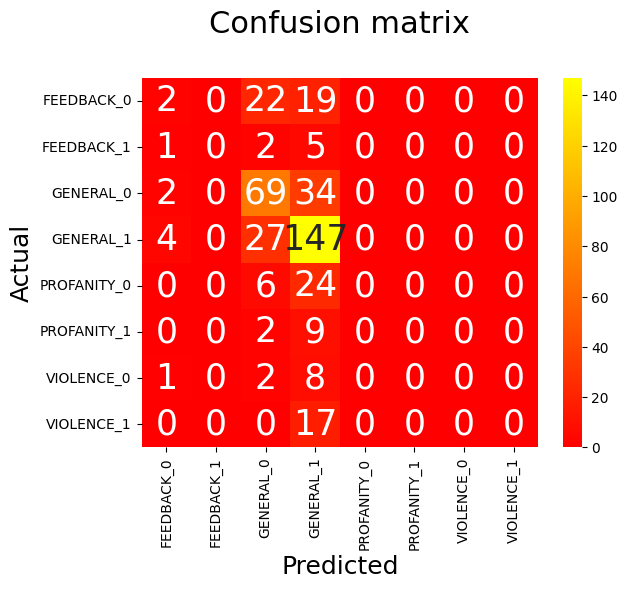

In [11]:
from sklearn.ensemble import AdaBoostClassifier

ada_classifier = AdaBoostClassifier(n_estimators=50, random_state=42) 
ada_classifier.fit(X_train_word2vec, y_train_word2vec)

ada_classifier_pred= make_scores(ada_classifier, X_test_word2vec, y_test_word2vec)
make_confusion_matrix(y_test_word2vec,ada_classifier_pred)


Clearly AdaBoost didn't work well either. Why not try word2vec vectors made from our own dataset

In [12]:
df= pd.read_csv('../Data/Preprocessed/word2vec_df.csv')
df_word2vec= df.copy()
df_word2vec.head(2)

,0,1,2,3,4,5,6,7,8,9,...,91,92,93,94,95,96,97,98,99,Target
0,-0.232668,0.454456,0.377842,0.232187,-0.111215,-0.574158,0.196363,1.015102,-0.608925,-0.391485,...,-0.106739,0.301462,0.026194,1.040798,0.283798,0.329874,-0.286696,0.271906,0.035611,2
1,-0.231003,0.450847,0.373016,0.224788,-0.106883,-0.568405,0.193457,1.001529,-0.599364,-0.391566,...,-0.103629,0.294274,0.024000,1.027592,0.279513,0.330153,-0.282997,0.266399,0.033298,3


In [13]:
X_train_word2vec, X_test_word2vec, X_val_word2vec, y_train_word2vec, y_test_word2vec, y_val_word2vec = train_test_val_split(df_word2vec)

Shape of feature vectors (X): (4035, 100)
Shape of target labels (y): (4035,)


Accuracy :0.44169
AUC : 0.68248
Precision : 0.05521
Recall : 0.12500
F1 : 0.07659
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        43
           1       0.00      0.00      0.00         8
           2       0.00      0.00      0.00       105
           3       0.44      1.00      0.61       178
           4       0.00      0.00      0.00        30
           5       0.00      0.00      0.00        11
           6       0.00      0.00      0.00        11
           7       0.00      0.00      0.00        17

    accuracy                           0.44       403
   macro avg       0.06      0.12      0.08       403
weighted avg       0.20      0.44      0.27       403



/home/angel-tamang/myenv/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/angel-tamang/myenv/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/angel-tamang/myenv/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/a

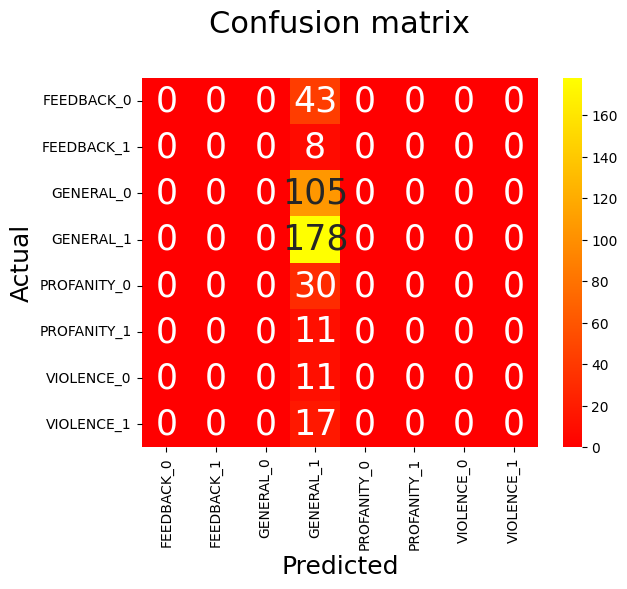

In [14]:
# Training SVC

svc_model = SVC(probability=True)
svc_model.fit(X_train_word2vec,y_train_word2vec)

# Scores of SVC
svc_pred=make_scores(svc_model, X_test_word2vec, y_test_word2vec)

# Confusion Matrix for SVC
make_confusion_matrix(y_test_word2vec,svc_pred)


doesn't look good again, let's try PCA 

In [15]:
import pandas as pd
from sklearn.decomposition import PCA

# Define the number of principal components
n_components = 50
pca = PCA(n_components=n_components)

# Apply PCA on the training set 
X_train_word2vec_pca = pca.fit_transform(X_train_word2vec)

# Transform the validation and test sets using the same PCA model
X_val_word2vec_pca = pca.transform(X_val_word2vec)
X_test_word2vec_pca = pca.transform(X_test_word2vec)

# Convert PCA results to DataFrames
X_train_word2vec_pca_df = pd.DataFrame(X_train_word2vec_pca, columns=[f"PC{i+1}" for i in range(n_components)])
X_val_word2vec_pca_df = pd.DataFrame(X_val_word2vec_pca, columns=[f"PC{i+1}" for i in range(n_components)])
X_test_word2vec_pca_df = pd.DataFrame(X_test_word2vec_pca, columns=[f"PC{i+1}" for i in range(n_components)])

Accuracy :0.44169
AUC : 0.67008
Precision : 0.11767
Recall : 0.12549
F1 : 0.07876
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        43
           1       0.00      0.00      0.00         8
           2       0.50      0.01      0.02       105
           3       0.44      0.99      0.61       178
           4       0.00      0.00      0.00        30
           5       0.00      0.00      0.00        11
           6       0.00      0.00      0.00        11
           7       0.00      0.00      0.00        17

    accuracy                           0.44       403
   macro avg       0.12      0.13      0.08       403
weighted avg       0.33      0.44      0.27       403



/home/angel-tamang/myenv/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/angel-tamang/myenv/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/angel-tamang/myenv/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/a

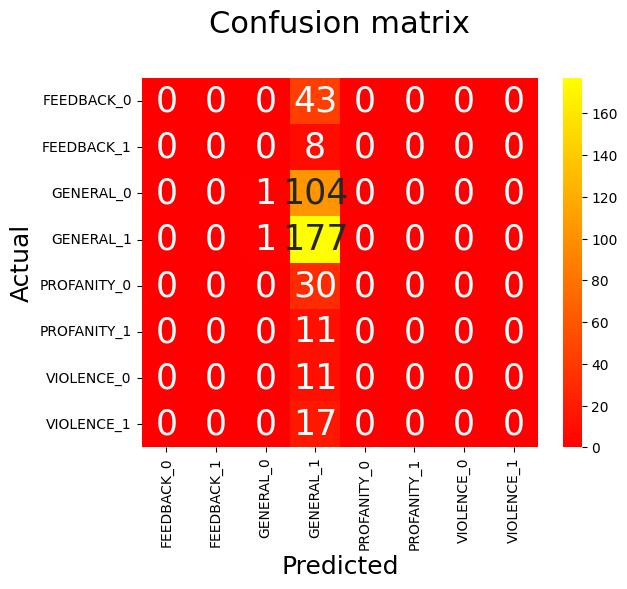

In [16]:
# Training SVC_pca

svc_model_pca = SVC(probability=True)
svc_model_pca.fit(X_train_word2vec_pca,y_train_word2vec)

# Scores of SVC_pca
svc_pca_pred=make_scores(svc_model_pca, X_test_word2vec_pca, y_test_word2vec)

# Confusion Matrix for SVC_pca
make_confusion_matrix(y_test_word2vec,svc_pca_pred)

ADAboostClassifier

Accuracy :0.47643
AUC : 0.60146
Precision : 0.14362
Recall : 0.15560
F1 : 0.13587
              precision    recall  f1-score   support

           0       0.17      0.07      0.10        43
           1       0.00      0.00      0.00         8
           2       0.49      0.28      0.35       105
           3       0.49      0.90      0.63       178
           4       0.00      0.00      0.00        30
           5       0.00      0.00      0.00        11
           6       0.00      0.00      0.00        11
           7       0.00      0.00      0.00        17

    accuracy                           0.48       403
   macro avg       0.14      0.16      0.14       403
weighted avg       0.36      0.48      0.38       403



/home/angel-tamang/myenv/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/angel-tamang/myenv/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/angel-tamang/myenv/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/a

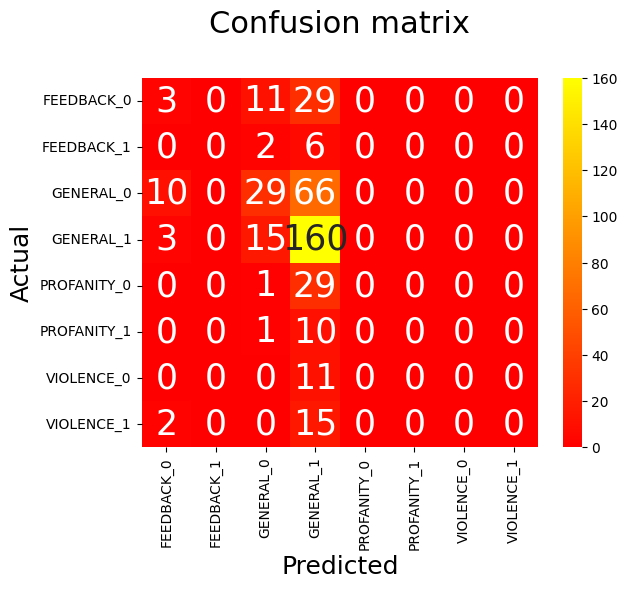

In [17]:
ada_classifier = AdaBoostClassifier(n_estimators=50, random_state=42) 
ada_classifier.fit(X_train_word2vec, y_train_word2vec)

ada_classifier_pred= make_scores(ada_classifier, X_test_word2vec, y_test_word2vec)
make_confusion_matrix(y_test_word2vec,ada_classifier_pred)

AdaBoost with PCA

Accuracy :0.52109
AUC : 0.69015
Precision : 0.14005
Recall : 0.17188
F1 : 0.14785
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        43
           1       0.00      0.00      0.00         8
           2       0.62      0.48      0.54       105
           3       0.50      0.90      0.65       178
           4       0.00      0.00      0.00        30
           5       0.00      0.00      0.00        11
           6       0.00      0.00      0.00        11
           7       0.00      0.00      0.00        17

    accuracy                           0.52       403
   macro avg       0.14      0.17      0.15       403
weighted avg       0.38      0.52      0.43       403



/home/angel-tamang/myenv/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/angel-tamang/myenv/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/angel-tamang/myenv/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/a

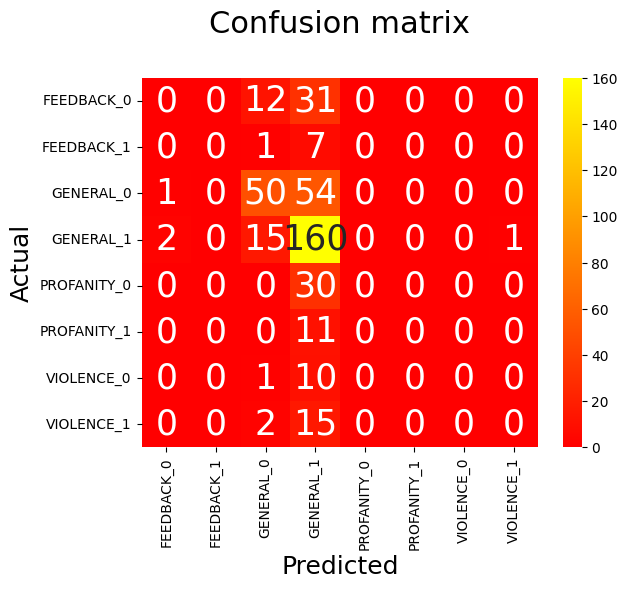

In [18]:
ada_classifier_pca = AdaBoostClassifier(n_estimators=50, random_state=42) 
ada_classifier_pca.fit(X_train_word2vec_pca, y_train_word2vec)

ada_classifier_pca_pred= make_scores(ada_classifier_pca, X_test_word2vec_pca, y_test_word2vec)
make_confusion_matrix(y_test_word2vec,ada_classifier_pca_pred)